# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

## Define BEST
Highest ROI for 2 years

In [189]:
from time_series import *

In [3]:
df = pd.read_csv('zillow_data.csv')

In [4]:
df.head(50)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [6]:
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [190]:
rva = get_df(df, state_initials='VA', county='Henrico', start='2010-01')
rva

,City,State,Metro,CountyName,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
RegionName,,,,,,,,,,,,,,,,,,,,,
23228,Laurel,VA,Richmond,Henrico,163400.0,163200.0,162900.0,162700.0,162200.0,161500.0,...,176800,177700,178700,180300,182100,183600,184800,185900,187700,189100
23231,Henrico,VA,Richmond,Henrico,157400.0,157300.0,156800.0,155700.0,154400.0,153200.0,...,166000,167000,167800,168500,169900,171000,171800,172600,174000,175100
23060,Glen Allen,VA,Richmond,Henrico,240400.0,240500.0,239500.0,237900.0,236200.0,234700.0,...,270000,270000,270500,271400,272600,273300,274100,275600,277500,277900
23059,Glen Allen,VA,Richmond,Henrico,363000.0,364000.0,362900.0,359200.0,355300.0,352800.0,...,417000,415200,415100,416200,417400,418100,419200,420900,423600,425000
23229,Henrico,VA,Richmond,Henrico,233400.0,233500.0,232800.0,231700.0,230800.0,229400.0,...,270100,270400,271400,272900,274700,275900,276700,278600,282300,284400
23233,Henrico,VA,Richmond,Henrico,277300.0,276700.0,275600.0,273400.0,270800.0,269100.0,...,326800,327100,328100,328900,330000,331600,333700,335700,338300,339700
23238,Henrico,VA,Richmond,Henrico,257900.0,257700.0,257100.0,255800.0,254000.0,252400.0,...,295400,295800,297000,298700,300000,300500,301300,302600,304300,304700
23294,Henrico,VA,Richmond,Henrico,181200.0,181200.0,180700.0,179800.0,179200.0,178700.0,...,199200,199600,200200,200800,202000,203800,205700,207800,209900,210700
23150,Sandston,VA,Richmond,Henrico,165500.0,165300.0,164700.0,163500.0,162200.0,160700.0,...,168800,169400,170300,171000,172400,173400,173900,174600,176600,177900


In [180]:
dc = get_df(df, state_initials='DC', start='2010-01')
dc

,City,State,Metro,CountyName,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
RegionName,,,,,,,,,,,,,,,,,,,,,
20002,Washington,DC,Washington,District of Columbia,365300.0,365000.0,365600.0,368500.0,370200.0,369900.0,...,662800,668000,672200,673100,674600,678200,680900,683000,687500,691300
20009,Washington,DC,Washington,District of Columbia,689200.0,689000.0,692600.0,700300.0,705900.0,707100.0,...,1020000,1027500,1034300,1040500,1047400,1055400,1065900,1076400,1081000,1078200
20011,Washington,DC,Washington,District of Columbia,318800.0,319600.0,318800.0,314800.0,311400.0,308000.0,...,582200,586200,591200,593200,591200,589500,590800,599100,611400,619100
20019,Washington,DC,Washington,District of Columbia,196300.0,196200.0,195200.0,193200.0,191600.0,190900.0,...,291100,296300,302500,306700,308800,310800,313400,314100,311800,308600
20001,Washington,DC,Washington,District of Columbia,409300.0,410300.0,411200.0,414000.0,416000.0,416000.0,...,765000,768800,771200,773300,777600,780500,781600,785500,791400,793300
20020,Washington,DC,Washington,District of Columbia,236600.0,237700.0,235700.0,228800.0,224400.0,224600.0,...,314700,317600,321800,324500,324800,324900,324900,327300,332800,337000
20008,Washington,DC,Washington,District of Columbia,1242500.0,1242600.0,1241600.0,1229400.0,1213100.0,1212700.0,...,1501600,1508800,1509700,1506000,1509100,1514300,1519400,1527900,1539600,1545900
20003,Washington,DC,Washington,District of Columbia,561700.0,562000.0,564300.0,569600.0,573100.0,572900.0,...,801000,807200,811900,813400,814600,814600,815300,817300,820200,820200
20032,Washington,DC,Washington,District of Columbia,195900.0,195600.0,195000.0,193400.0,191000.0,188800.0,...,288100,293400,297800,301500,303700,304000,304600,306800,308200,307400


# Step 2: Data Preprocessing

In [13]:
def get_datetimes(df):
    """
    When column names are all dates
    Apply to column names
    Convert column names to datetimes
    """
    return pd.to_datetime(df.columns, format='%Y-%m')

In [76]:
df_rva.isna().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
CountyName    0
SizeRank      0
1996-04       0
1996-05       0
1996-06       0
1996-07       0
1996-08       0
1996-09       0
1996-10       0
1996-11       0
1996-12       0
1997-01       0
1997-02       0
1997-03       0
1997-04       0
1997-05       0
1997-06       0
1997-07       0
1997-08       0
1997-09       0
1997-10       0
1997-11       0
1997-12       0
1998-01       0
1998-02       0
             ..
2015-11       0
2015-12       0
2016-01       0
2016-02       0
2016-03       0
2016-04       0
2016-05       0
2016-06       0
2016-07       0
2016-08       0
2016-09       0
2016-10       0
2016-11       0
2016-12       0
2017-01       0
2017-02       0
2017-03       0
2017-04       0
2017-05       0
2017-06       0
2017-07       0
2017-08       0
2017-09       0
2017-10       0
2017-11       0
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int6

In [14]:
df2 = df.drop(['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], axis=1)
df2.head()

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [15]:
df2.columns

Index(['RegionName', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08',
       '1996-09', '1996-10', '1996-11', '1996-12',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=266)

In [16]:
df2.set_index('RegionName', inplace=True)

In [17]:
df2.columns = get_datetimes(df2)

In [18]:
df2.head()

,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,1996-07-01 00:00:00,1996-08-01 00:00:00,1996-09-01 00:00:00,1996-10-01 00:00:00,1996-11-01 00:00:00,1996-12-01 00:00:00,1997-01-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
RegionName,,,,,,,,,,,,,,,,,,,,,
60657,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
75070,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,215800.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
77494,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
60614,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,503400.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
79936,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


# Step 4: Reshape from Wide to Long Format

In [19]:
def melt_data(df, start_index=0):
    """
    Input zipcode dataframe
    Converts from wide format to long format
    For use with time series modeling
    """
    melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], 
                     var_name='Time')
    melted['Time'] = pd.to_datetime(melted['Time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('Time').aggregate({'value':'mean'})[start_index:]

In [20]:
def melt_df(df, start_index=0):
    """
    Input state-specific dataframe
    Uses melt_data function to convert from wide format to long format
    Returns melted dataframe
    """
    merged = []
    for zipcode in df.RegionName:
        melted = melt_data(df.loc[df['RegionName'] == zipcode])[start_index:]
        row = df.loc[df['RegionName'] == zipcode].iloc[:,:7]
        rows = pd.concat([row]*len(melted), ignore_index=True)
        merge = pd.concat([rows, melted.reset_index()], axis=1)
        merged.append(merge)
    melted_df = pd.concat(merged)
    return melted_df

In [21]:
df23220 = df.loc[(df.RegionName == 23220)]

In [22]:
melt23220 = melt_data(df23220,189)
melt23220.head()

,value
Time,
2012-01-01,177500.0
2012-02-01,178200.0
2012-03-01,178600.0
2012-04-01,178800.0
2012-05-01,180200.0


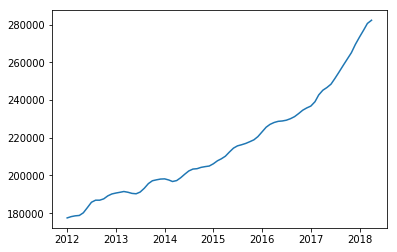

In [23]:
plt.plot(melt23220)

In [24]:
melt_dc = melt_df(df_dc)
melt_dc.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Time,value
0,66126,20002,Washington,DC,Washington,District of Columbia,30,1996-04-01,94300.0
1,66126,20002,Washington,DC,Washington,District of Columbia,30,1996-05-01,94000.0
2,66126,20002,Washington,DC,Washington,District of Columbia,30,1996-06-01,93700.0
3,66126,20002,Washington,DC,Washington,District of Columbia,30,1996-07-01,93600.0
4,66126,20002,Washington,DC,Washington,District of Columbia,30,1996-08-01,93400.0


In [25]:
melt_dc.shape

(4770, 9)

# Step 3: EDA and Visualization

In [26]:
#font = {'family' : 'normal',
#        'weight' : 'bold',
#        'size'   : 22}

#matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [27]:
def plot_time_series(df, name=None, legend=None):
    # Instantiate a figure object. 
    plt.figure()
    if not legend:
        legend = list(df['RegionName'])
    # Enumerate through each row in the dataframe passed in. Each row is a different zipcode.
    for ind, row in df.iterrows():
        # Get the median housing value data for the date ranges we want and store in a Series object
        data = pd.Series(row.iloc[7:])
        # Set the appropriate datetimes for data as the index for our data series
        data.index = pd.to_datetime(df.columns[7:])
        # Plot data for current zipcode on figure we instantiated on line 4. Set xticks to corresponding datetimes
        # Also make the figure large, so that we can read it more easily
        ax = data.plot(figsize=(20, 10), xticks=df.columns[7:])
        # add a label
        plt.ylabel("Median House Values")
        # let matplootlib autoformat the datetimes for the xticks
        plt.gcf().autofmt_xdate()
        # If name of city was provided, use it to set title of plot
        if name:
            plt.title("Median Home Value by Zip Code in {} from 1997-2013".format(name))
        else:
            plt.title("Median Home Value, 1997-2013")
    plt.legend(legend)        
    plt.show()

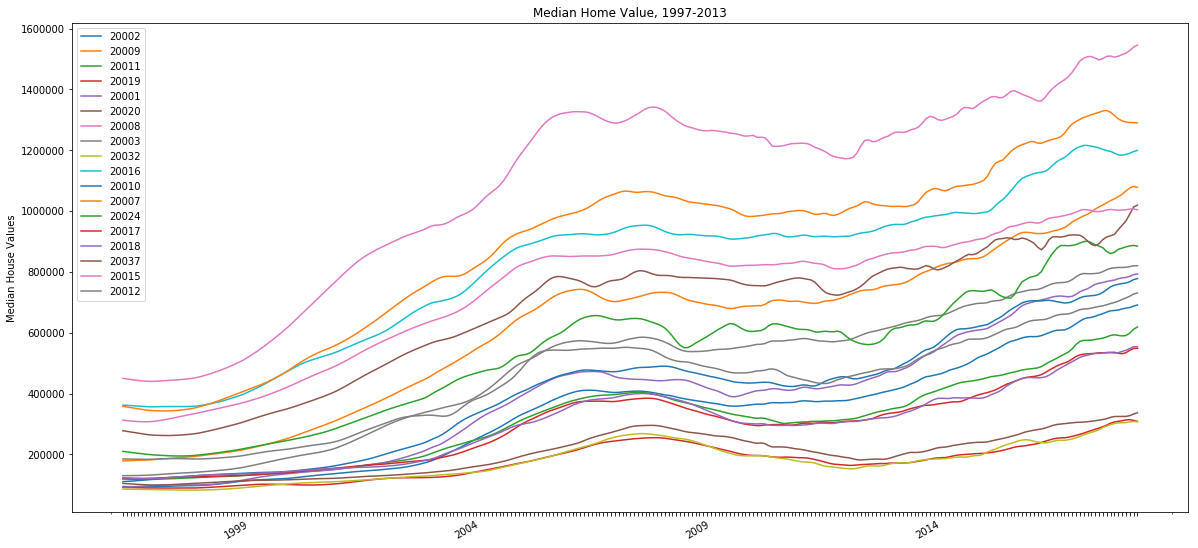

In [28]:
plot_time_series(df_dc)

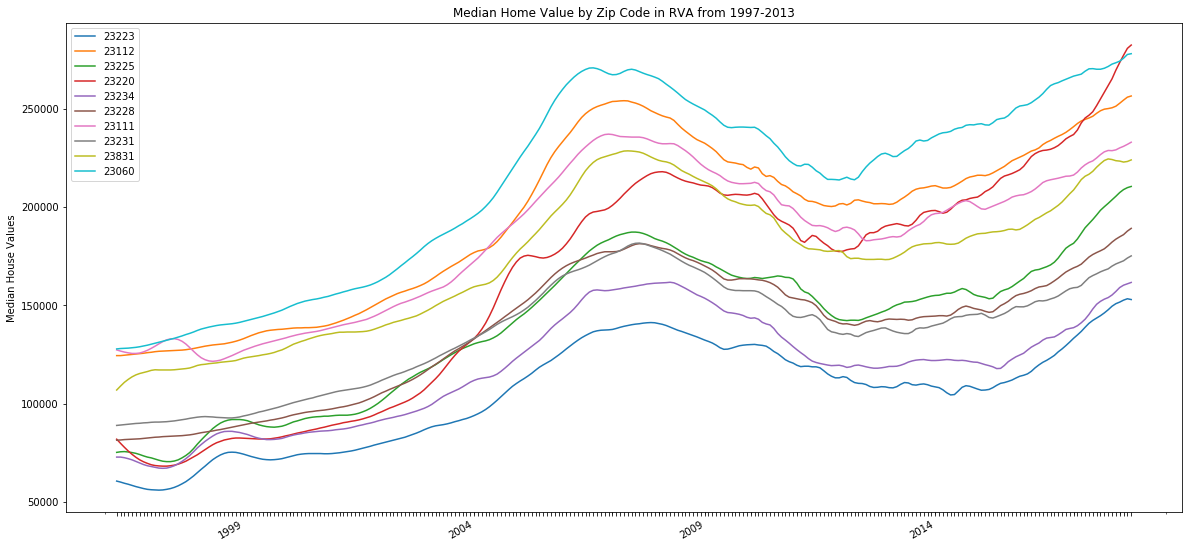

In [29]:
plot_time_series(df_rva, name='RVA')

# Step 5: ARIMA Modeling

In [30]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
#warnings.
import itertools
#import pandas as pd
#import numpy as np
import statsmodels.api as sm
#import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
#plt.style.use('ggplot')#

In [31]:
#zipcode 20024
df20024 = df.loc[df.RegionName == 20024]
melt20024 = melt_data(df20024)
melt20024.head()

,value
Time,
1996-04-01,209800.0
1996-05-01,208200.0
1996-06-01,206600.0
1996-07-01,205000.0
1996-08-01,203300.0


In [32]:
data_diff = melt20024.diff().dropna()
data_diff.head()

,value
Time,
1996-05-01,-1600.0
1996-06-01,-1600.0
1996-07-01,-1600.0
1996-08-01,-1700.0
1996-09-01,-1400.0


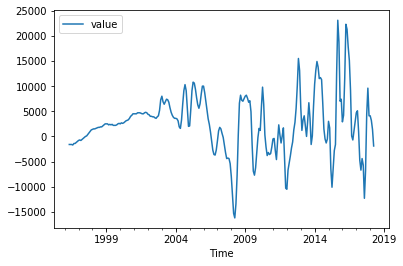

In [33]:
data_diff.plot();

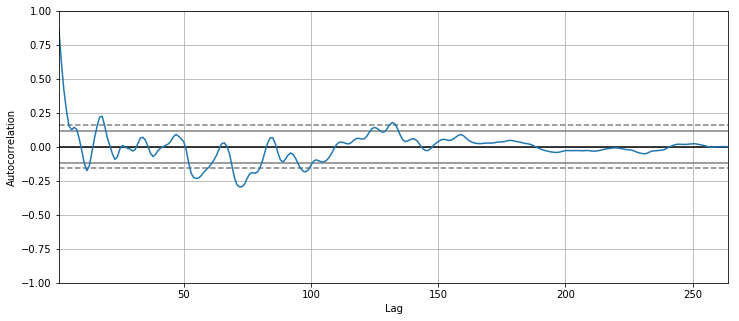

In [34]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(data_diff.dropna());

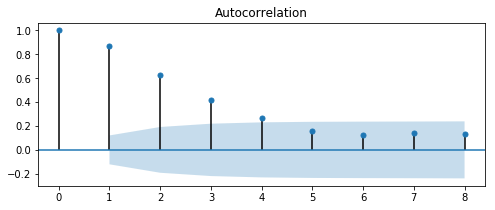

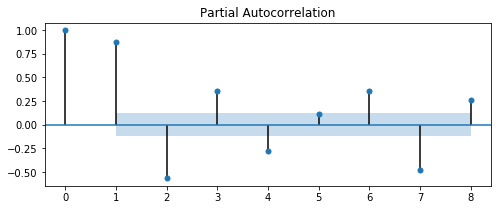

In [35]:
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(data_diff,ax=ax, lags=8);

fig, ax = plt.subplots(figsize=(8,3))
plot_pacf(data_diff,ax=ax, lags=8);

In [36]:
def stationarity_check(TS, threshold=.01):
    """
    p-value > 0.05: Fail to reject the null hypothesis, the data is non-stationary.
    p-value <= 0.05: Reject the null hypothesis, the data is stationary.
    """
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 8, center = False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['value'])
    
    if dftest[1] < threshold:
        #Plot rolling statistics:
        fig = plt.figure(figsize=(12,6))
        orig = plt.plot(TS, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        plt.show(block=False)
        print('Reject the null hypothesis, the data is stationary.')
    else:
        print('Fail to reject the null hypothesis, the data is non-stationary.')
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print('p-value = {}'.format(dfoutput[1]))
    
    return dftest[1]

In [37]:
def make_stationary(df, threshold=.01):
    d = 0
    for i in range(0,len(df)):
        print('d=', d)
        data_diff = df.diff(periods=i).dropna()
        dftest = stationarity_check(data_diff)
        if dftest < threshold:
            break
        else:
            d+=1
    print('d=', d)
    return d

d= 0
Fail to reject the null hypothesis, the data is non-stationary.
Results of Dickey-Fuller Test:
p-value = nan
d= 1
Fail to reject the null hypothesis, the data is non-stationary.
Results of Dickey-Fuller Test:
p-value = 0.0517740338601735
d= 2
Fail to reject the null hypothesis, the data is non-stationary.
Results of Dickey-Fuller Test:
p-value = 0.7254795716226881
d= 3
Fail to reject the null hypothesis, the data is non-stationary.
Results of Dickey-Fuller Test:
p-value = 0.9551217513286289
d= 4
Fail to reject the null hypothesis, the data is non-stationary.
Results of Dickey-Fuller Test:
p-value = 0.947847029218061
d= 5
Fail to reject the null hypothesis, the data is non-stationary.
Results of Dickey-Fuller Test:
p-value = 0.9838148360866614
d= 6
Fail to reject the null hypothesis, the data is non-stationary.
Results of Dickey-Fuller Test:
p-value = 0.9798921965616322
d= 7
Fail to reject the null hypothesis, the data is non-stationary.
Results of Dickey-Fuller Test:
p-value = 0.8

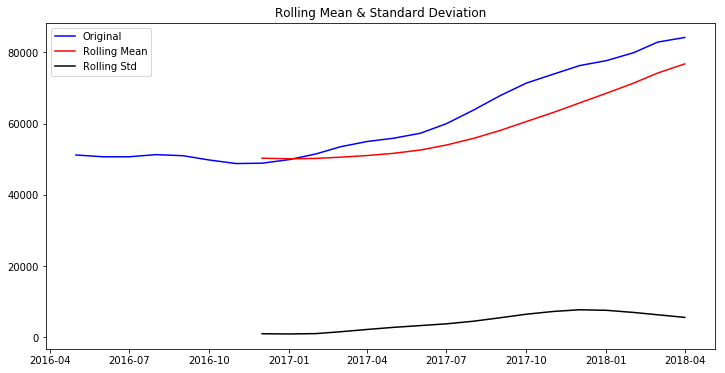

Reject the null hypothesis, the data is stationary.
Results of Dickey-Fuller Test:
p-value = 4.517381067715315e-09
d= 52


52

In [38]:
make_stationary(melt23220, threshold=.05)

In [39]:
X = melt20024.values
X.size*.8

212.0

In [40]:
train = X[:212]
test = X[212:]

In [41]:
predictions = []

In [42]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

In [43]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [44]:
predictions = model_ar_fit.predict(start=212, end=265)

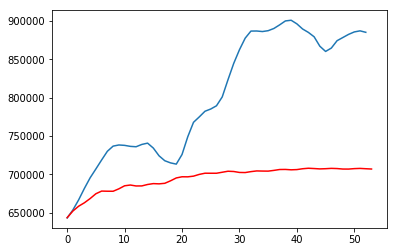

In [45]:
plt.plot(test)
plt.plot(predictions, color='Red')
plt.show()

In [46]:
#p = periods taken for autoregressive model
#d = integrated order, differencing
#q = periods in moving average model
model_arima = ARIMA(train,order=(2,1,2))
model_arima_fit = model_arima.fit()

In [47]:
test.size

53

In [48]:
predictions = model_arima_fit.forecast(steps=53)[0]

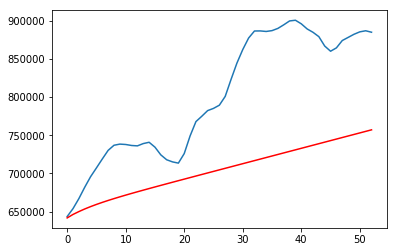

In [49]:
plt.plot(test)
plt.plot(predictions, color='Red')
plt.show()

In [50]:
def optimize_parameters(r):
    p = d = q = range(0, r)
    pdq = list(itertools.product(p, d, q))
    return pdq

In [51]:
params = optimize_parameters(6)
len(params)

216

In [52]:
def fit_arima_model(df_train, params):
    aic = {}
    for param in params:
        try:
            model_arima = ARIMA(train,order=param)
            model_arima_fit = model_arima.fit()
            metric = model_arima_fit.aic
            #print(param, metric)
            aic.update({param: metric})
        except:
            continue
    optimal_params = min(aic, key=aic.get)
    min_aic = min(aic.values())
    return optimal_params

In [53]:
optimal_params = fit_arima_model(train, params)

In [54]:
def plot_arima(train, test, optimal_params):
    model_arima = ARIMA(train,order=optimal_params)
    model_arima_fit = model_arima.fit()
    predictions = model_arima_fit.forecast(steps=len(test))[0]
    plt.plot(test)
    plt.plot(predictions, color='Red')
    plt.show()

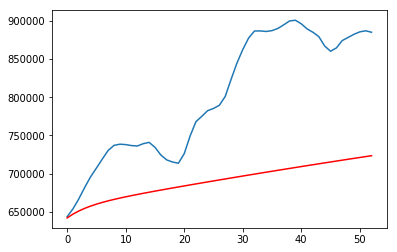

In [55]:
plot_arima(train, test, optimal_params)

In [56]:
# Import the ARMA module from statsmodels
#from statsmodels.tsa.arima_model import ARMA
#import statsmodels.api as sm

# Fit an ARMA(2,1) model to the first simulated data
mod_arma = ARMA(data_diff, order=(2,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  264
Model:                     ARMA(2, 1)   Log Likelihood               -2405.798
Method:                       css-mle   S.D. of innovations           2184.249
Date:                Tue, 30 Jul 2019   AIC                           4821.595
Time:                        13:30:41   BIC                           4839.475
Sample:                    05-01-1996   HQIC                          4828.780
                         - 04-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2462.0025    820.314      3.001      0.003     854.217    4069.788
ar.L1.value     1.1007      0.070     15.661      0.000       0.963       1.238
ar.L2.value    -0.3422      0.069     -4.975    

In [57]:
# Fit an ARMA(2,2) model to the first simulated data
mod_arma = ARMA(data_diff, order=(2,2))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  264
Model:                     ARMA(2, 2)   Log Likelihood               -2364.168
Method:                       css-mle   S.D. of innovations           1853.103
Date:                Tue, 30 Jul 2019   AIC                           4740.336
Time:                        13:30:42   BIC                           4761.792
Sample:                    05-01-1996   HQIC                          4748.958
                         - 04-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2458.3353    948.965      2.591      0.010     598.399    4318.272
ar.L1.value     0.2110      0.066      3.201      0.002       0.082       0.340
ar.L2.value     0.3639      0.067      5.443    

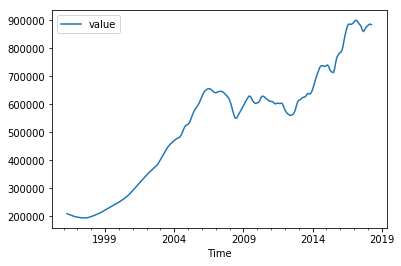

In [58]:
melt20024.plot()

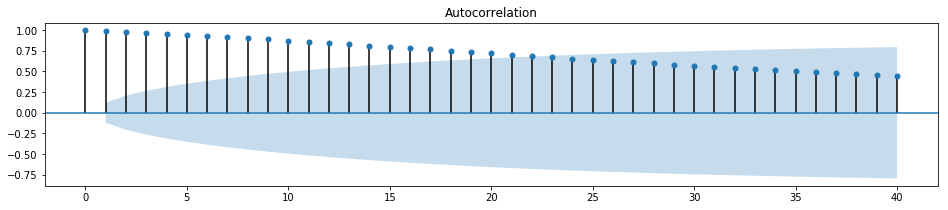

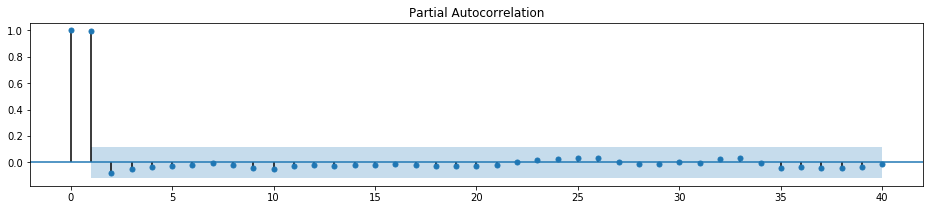

In [59]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(melt20024,ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(melt20024,ax=ax, lags=40);

In [60]:
# Fit an AR(1) model to the first simulated data
mod_arma = ARMA(melt20024, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  265
Model:                     ARMA(1, 0)   Log Likelihood               -2699.556
Method:                       css-mle   S.D. of innovations           6330.337
Date:                Tue, 30 Jul 2019   AIC                           5405.113
Time:                        13:30:43   BIC                           5415.852
Sample:                    04-01-1996   HQIC                          5409.428
                         - 04-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.272e+05   3.31e+05      1.595      0.112   -1.21e+05    1.18e+06
ar.L1.value     0.9998      0.000   3934.110      0.000       0.999       1.000
                                    Roots       

In [61]:
# The 'MS' string groups the data in buckets by start of the month
#CO2 = df['co2'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
#CO2 = CO2.fillna(CO2.bfill())

In [62]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [63]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_diff,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

In [64]:
# Find the parameters with minimal AIC value.

ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic           4389.17
Name: 63, dtype: object

In [65]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(melt20024,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8051      0.042     19.122      0.000       0.723       0.888
ma.L1          0.4087      0.024     16.685      0.000       0.361       0.457
ar.S.L12      -0.4214      0.053     -7.996      0.000      -0.525      -0.318
ma.S.L12      -0.0622      0.040     -1.568      0.117      -0.140       0.016
sigma2      1.332e+07   4.48e-10   2.97e+16      0.000    1.33e+07    1.33e+07


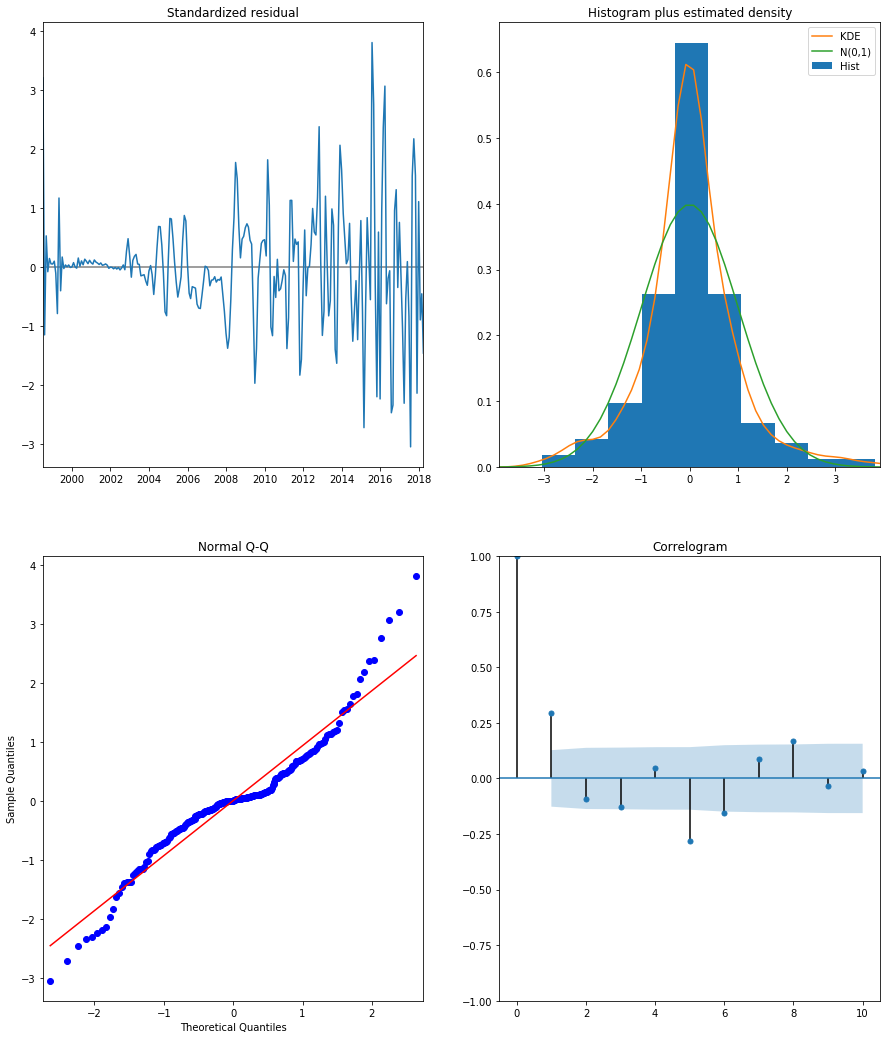

In [66]:
# Use plot_diagnostics with results calculated above.
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [67]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals.
pred = output.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_conf = pred.conf_int()

In [68]:
# Get dynamic predictions with confidence intervals as above.
pred_dynamic = output.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

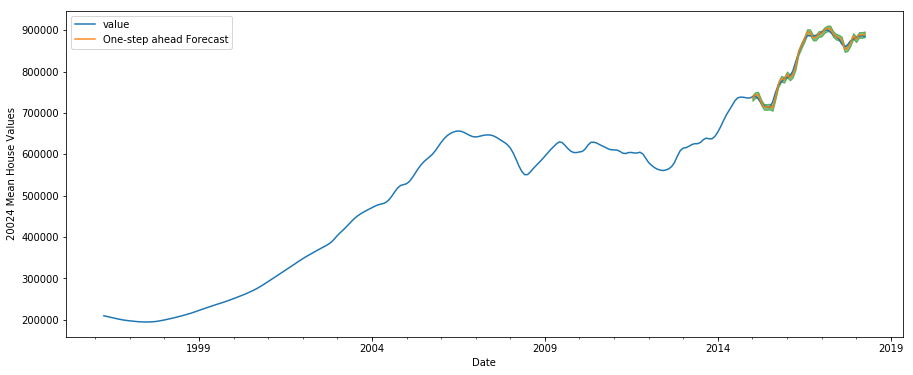

In [69]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = melt20024.plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('20024 Mean House Values')
plt.legend()

plt.show()

In [70]:
# Get the Real and predicted values
m20024_forecasted = pred.predicted_mean
m20024_truth = melt20024['2015-01-01':]

# Compute the mean square error
mse = ((m20024_forecasted - m20024_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2015-01-01 00:00:00   NaN
2015-02-01 00:00:00   NaN
2015-03-01 00:00:00   NaN
2015-04-01 00:00:00   NaN
2015-05-01 00:00:00   NaN
2015-06-01 00:00:00   NaN
2015-07-01 00:00:00   NaN
2015-08-01 00:00:00   NaN
2015-09-01 00:00:00   NaN
2015-10-01 00:00:00   NaN
2015-11-01 00:00:00   NaN
2015-12-01 00:00:00   NaN
2016-01-01 00:00:00   NaN
2016-02-01 00:00:00   NaN
2016-03-01 00:00:00   NaN
2016-04-01 00:00:00   NaN
2016-05-01 00:00:00   NaN
2016-06-01 00:00:00   NaN
2016-07-01 00:00:00   NaN
2016-08-01 00:00:00   NaN
2016-09-01 00:00:00   NaN
2016-10-01 00:00:00   NaN
2016-11-01 00:00:00   NaN
2016-12-01 00:00:00   NaN
2017-01-01 00:00:00   NaN
2017-02-01 00:00:00   NaN
2017-03-01 00:00:00   NaN
2017-04-01 00:00:00   NaN
2017-05-01 00:00:00   NaN
2017-06-01 00:00:00   NaN
2017-07-01 00:00:00   NaN
2017-08-01 00:00:00   NaN
2017-09-01 00:00:00   NaN
2017-10-01 00:00:00   NaN
2017-11-01 00:00:00   NaN
2017-12-01 00:00:00   NaN
2018-01-01 00:00:00  

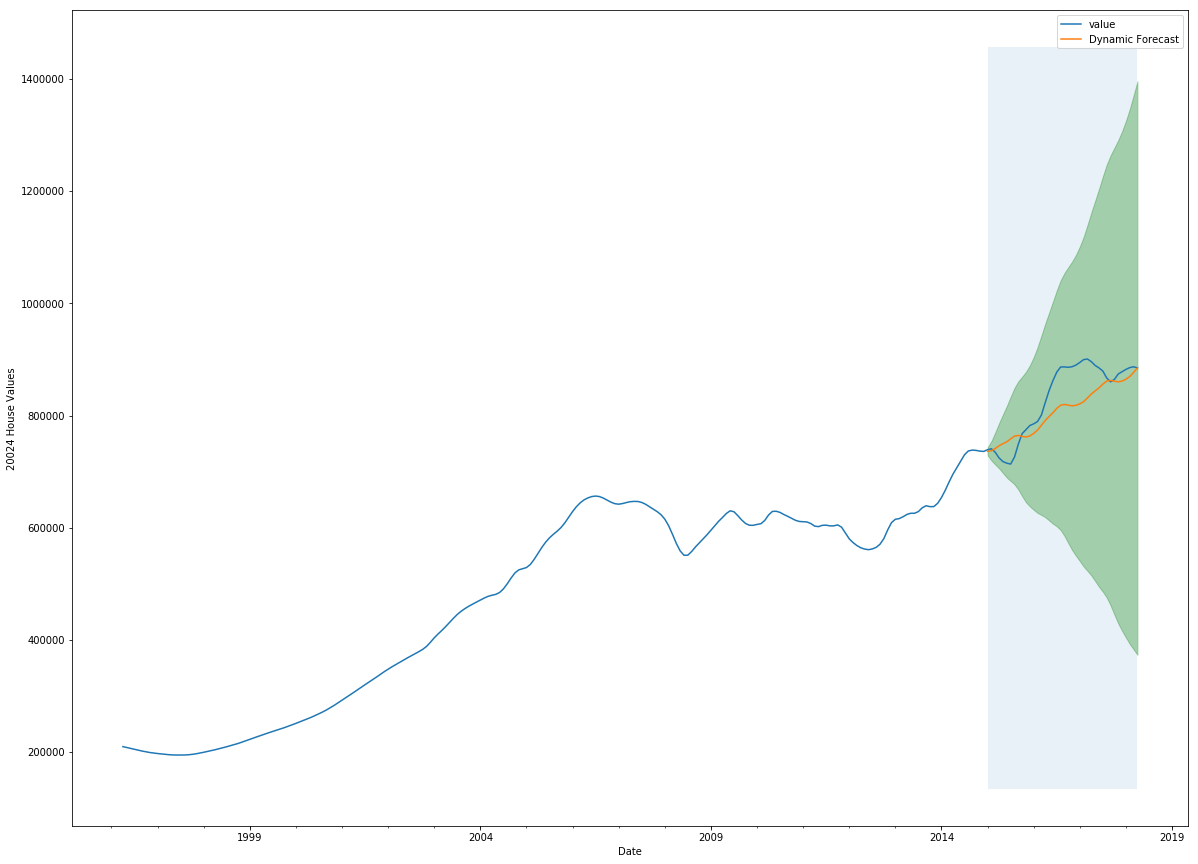

In [71]:
# Plot the dynamic forecast with confidence intervals.

ax = melt20024.plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2015-01-01'), m20024_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('20024 House Values')

plt.legend()
plt.show()

In [72]:
# Extract the predicted and true values of our time series
m20024_forecasted = pred_dynamic.predicted_mean
m20024_truth = melt20024['2015-01-01':]

# Compute the mean square error
mse = ((m20024_forecasted - m20024_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2015-01-01 00:00:00   NaN
2015-02-01 00:00:00   NaN
2015-03-01 00:00:00   NaN
2015-04-01 00:00:00   NaN
2015-05-01 00:00:00   NaN
2015-06-01 00:00:00   NaN
2015-07-01 00:00:00   NaN
2015-08-01 00:00:00   NaN
2015-09-01 00:00:00   NaN
2015-10-01 00:00:00   NaN
2015-11-01 00:00:00   NaN
2015-12-01 00:00:00   NaN
2016-01-01 00:00:00   NaN
2016-02-01 00:00:00   NaN
2016-03-01 00:00:00   NaN
2016-04-01 00:00:00   NaN
2016-05-01 00:00:00   NaN
2016-06-01 00:00:00   NaN
2016-07-01 00:00:00   NaN
2016-08-01 00:00:00   NaN
2016-09-01 00:00:00   NaN
2016-10-01 00:00:00   NaN
2016-11-01 00:00:00   NaN
2016-12-01 00:00:00   NaN
2017-01-01 00:00:00   NaN
2017-02-01 00:00:00   NaN
2017-03-01 00:00:00   NaN
2017-04-01 00:00:00   NaN
2017-05-01 00:00:00   NaN
2017-06-01 00:00:00   NaN
2017-07-01 00:00:00   NaN
2017-08-01 00:00:00   NaN
2017-09-01 00:00:00   NaN
2017-10-01 00:00:00   NaN
2017-11-01 00:00:00   NaN
2017-12-01 00:00:00   NaN
2018-01-01 00:00:00  

In [73]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

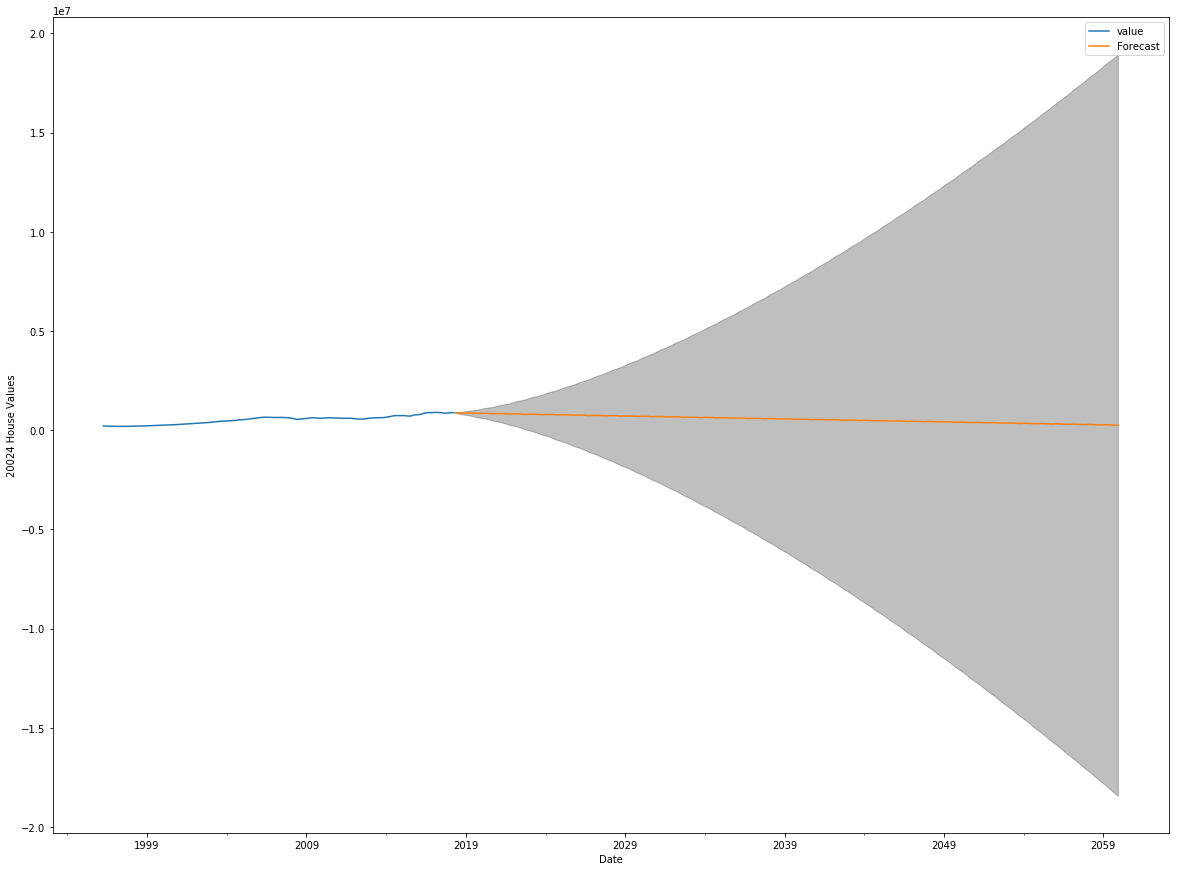

In [74]:
# Plot future predictions with confidence intervals

ax = melt20024.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('20024 House Values')

plt.legend()
plt.show()

# Step 6: Interpreting Results

**Brainstorming**

I want to have a function where I can put in the name of a state and it will return the 5 best zipcodes to invest in based on a given time analysis

Functions needed:
* get_state_df - input any state to get state-specific data from original dataframe
* get_zipcode_df - get zipcode-specific data from given dataframe
* melt_data - get time series for given zipcode dataframe
* melt_df - get long format of original dataframe for visual analysis
* plot_diff_acf_pacf - for given melted df plot diff, acf, and pacf
* check_stationarity - mean = 0, variance constant
* make_stationary - differencing until stationary
* make_model - given optimal params, find best model based on criterion
* optimize_parameters - given ranges for parameters, make combos
* check_residuals - check aic of residuals, should be random noise

* starter notebook
    * one subset of zipcodes
    * test with one zipcode
    * functions mixed in where used
    * lots of markdowns and explanations for decisions
    * include cells for observations after graphs, models
* py file for functions
    * consolidate all functions used in starter notebook
    * include all imports needed
* template notebook
    * import py file
    * include all explanatory markdowns from starter notebook
    * include blank cells for observations
* second study
    * duplicate template notebook
    * same process on a different subset of zipcodes
    * record thoughts for future work to make functions work better given any subset of zipcodes